<a href="https://colab.research.google.com/github/BinXoai/Machine_Learning/blob/main/Supermarket_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# data manipulation
import numpy as np
import pandas as pd
from scipy.stats import (chi2_contingency, randint,
                         expon, gamma, uniform, loguniform)
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# data processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   MinMaxScaler, StandardScaler,
                                   LabelEncoder)
from sklearn.compose import ColumnTransformer

# imblanced dataset
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from imblearn.combine import SMOTEENN

# binary classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
# modelling
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
# display images
import graphviz

# metrics
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import silhouette_score

#Debug lỗi không import được xgboost
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier #!pip install xgboost

In [3]:
file_url = 'https://drive.google.com/file/d/1Ehh20SlWse3jIJ58gr5LIndGG-vfQMB0/view'
file_id = file_url.split('/')[-2]
url = 'https://drive.google.com/uc?id=' + file_id

print(file_id)
print(url)

df = pd.read_csv(url)

1Ehh20SlWse3jIJ58gr5LIndGG-vfQMB0
https://drive.google.com/uc?id=1Ehh20SlWse3jIJ58gr5LIndGG-vfQMB0


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.sample()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
194,195,Female,47,120,16


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df["Genre"]=df["Genre"].replace(['Female','Male'],[0,1]) # Chuyển giới tính thành data phân loại 0 và 1

In [9]:
df = df.drop(columns='CustomerID',axis=1)

In [10]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Unsupervised Learning (Theo cách thầy)

## 1. Dùng silhouette coefficients

In [11]:
si = []
for k in range(2, 20,1):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(df)
 score = silhouette_score(df, kmeans.labels_)
 si.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [12]:
si

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.4440669204743008,
 0.45206493204632353,
 0.43946743327036053,
 0.427541566977401,
 0.4110379534630241,
 0.37199139275527615,
 0.3749271465526897,
 0.3596876162540989,
 0.34417566913861514,
 0.3426627544784218,
 0.34554269390087855,
 0.31916948399801337,
 0.35102086429403384,
 0.33905286844740473,
 0.3347575377112233]

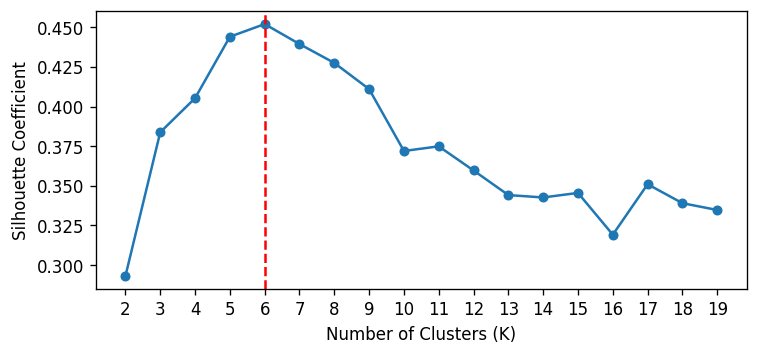

In [13]:
#Trực quan hoá Silhoutte coefficients
plt.plot(range(2, 20), si,'.-',markersize=10)
plt.xticks(range(2, 20))
plt.axvline(x=6, color='r', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Coefficient")
plt.show()

## 2. Dùng elbow với giá trị wcss

In [14]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_/1000)

In [15]:
wcss

[212.88944245524303,
 143.39159236035675,
 104.41467534220168,
 75.39961541401485,
 58.348641363315046,
 51.13270321257691,
 44.39211566567935,
 41.0008742213207,
 37.64969225429742,
 34.66508727759879,
 31.659187454375694,
 29.388612888839752,
 28.170631036266236,
 26.470479533783212,
 24.71285956061911,
 23.769679820261434,
 22.83086351611351,
 20.917416472416473]

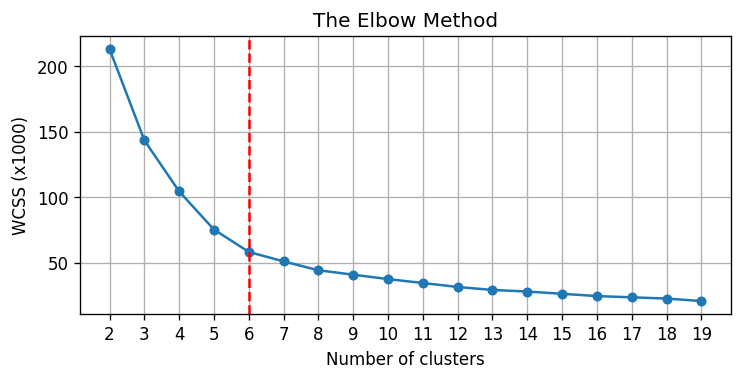

In [16]:
#Trực quan hoá Elbow
plt.plot(range(2, 20), wcss,'.-',markersize=10)
plt.xticks(range(2, 20))
plt.axvline(x=6, color='r', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (x1000)')
plt.grid(linestyle='-')
plt.show()

Vậy ta chọn được k = 6

## 3. K - Means Clustering

In [17]:
#Gán biến cho model và train
kmeans = KMeans(n_clusters = 6)
y_pred = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [19]:
#Add thêm cột class vào bảng dat
df['Class']=y_pred

In [20]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,19,15,39,4
1,1,21,15,81,5
2,0,20,16,6,4
3,0,23,16,77,5
4,0,31,17,40,4


## 4. Thử sử dụng Hierarchical Clustering

In [21]:
df1 = df.drop(columns = ['Class'],axis = 1) #Loại bỏ cột class

In [22]:
df1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [23]:
#Scale cho tập data
df1_scaled = normalize(df1.values) #normalize data cho hàm phía dưới tiện tính toán
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)
df1_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.021780,0.413826,0.326705,0.849433
1,0.011762,0.247008,0.176434,0.952743
2,0.000000,0.760286,0.608229,0.228086
3,0.000000,0.280697,0.195267,0.939723
4,0.000000,0.580683,0.318439,0.749269


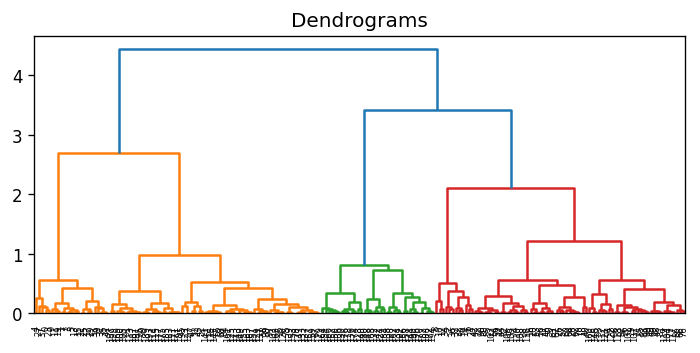

In [24]:
#Vẽ Hierarchical Cách 1
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df1_scaled.values, method='ward'))
# plt.axhline(y=140, color='r', linestyle='--')
# plt.axhline(y=350, color='green', linestyle='--')

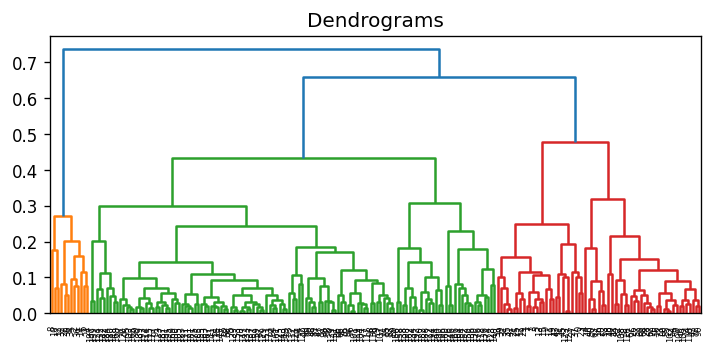

In [25]:
#Vẽ Hierarchical Cách 2
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df1_scaled.values, method='weighted'))
# plt.axhline(y=60, color='r', linestyle='--')
#plt.axhline(y=200, color='green', linestyle='--')

# Unsupervised Learning (Theo cách Anh Quang)

## 1. K - Means Clustering

In [26]:
# kmeans
kmeans_analysis = KMeans(n_clusters=4)
kmeans_analysis.fit(df)
kmeans_analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [27]:
kmeans_analysis.cluster_centers_

array([[5.26315789e-01, 4.03947368e+01, 8.70000000e+01, 1.86315789e+01,
        2.07894737e+00],
       [3.78947368e-01, 4.48947368e+01, 4.87052632e+01, 4.26315789e+01,
        2.26315789e+00],
       [4.61538462e-01, 3.26923077e+01, 8.65384615e+01, 8.21282051e+01,
        4.44089210e-16],
       [5.00000000e-01, 2.48214286e+01, 2.87142857e+01, 7.42500000e+01,
        4.60714286e+00]])

In [28]:
y_pred = kmeans_analysis.labels_
y_pred

array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [29]:
#Add thêm cột class vào bảng data
df['Class']=y_pred


In [30]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,1
3,0,23,16,77,3
4,0,31,17,40,1


## 2. Silhouette vs Elbow (Tìm Hyperparameter)

In [31]:
k_range = list(range(2, 20))

sil_scores = list()
wcss_scores = list()
for k in k_range:
    kmeans_analysis = KMeans(n_clusters=k, n_init='auto')
    kmeans_analysis.fit(df)
    sil_score = silhouette_score(df, kmeans_analysis.labels_, metric='euclidean')
    wcss = kmeans_analysis.inertia_
    sil_scores.append(sil_score)
    wcss_scores.append(wcss)
    print(f"k = {k} ta có sil_score: {sil_score} và wcss_score: {wcss}")

k = 2 ta có sil_score: 0.2931826250603939 và wcss_score: 212965.41994884907
k = 3 ta có sil_score: 0.3837754943574215 và wcss_score: 143478.09642539744
k = 4 ta có sil_score: 0.4059332716661578 và wcss_score: 104423.82456873085
k = 5 ta có sil_score: 0.44042602824436095 và wcss_score: 75542.36070359594
k = 6 ta có sil_score: 0.4115585801370131 và wcss_score: 68502.0289719942
k = 7 ta có sil_score: 0.44640823023213083 và wcss_score: 52115.54620642515
k = 8 ta có sil_score: 0.4183030596255669 và wcss_score: 47885.942951684214
k = 9 ta có sil_score: 0.42206235469807424 và wcss_score: 41956.421369744334
k = 10 ta có sil_score: 0.3711696687794671 và wcss_score: 39751.32992944318
k = 11 ta có sil_score: 0.3669689690448694 và wcss_score: 34895.08923660783
k = 12 ta có sil_score: 0.36024321652334634 và wcss_score: 33390.339512923725
k = 13 ta có sil_score: 0.3585709959480684 và wcss_score: 33386.913904598994
k = 14 ta có sil_score: 0.3412146257251642 và wcss_score: 27609.861928104576
k = 15 ta

In [32]:
sil_scores

[0.2931826250603939,
 0.3837754943574215,
 0.4059332716661578,
 0.44042602824436095,
 0.4115585801370131,
 0.44640823023213083,
 0.4183030596255669,
 0.42206235469807424,
 0.3711696687794671,
 0.3669689690448694,
 0.36024321652334634,
 0.3585709959480684,
 0.3412146257251642,
 0.3173315472696607,
 0.3046069456444604,
 0.32391087269245283,
 0.3351556441473823,
 0.3408350319928389]

In [33]:
wcss_scores

[212965.41994884907,
 143478.09642539744,
 104423.82456873085,
 75542.36070359594,
 68502.0289719942,
 52115.54620642515,
 47885.942951684214,
 41956.421369744334,
 39751.32992944318,
 34895.08923660783,
 33390.339512923725,
 33386.913904598994,
 27609.861928104576,
 28885.162914671528,
 25795.041856243173,
 25328.352744232892,
 22601.04702380953,
 21145.097674710916]

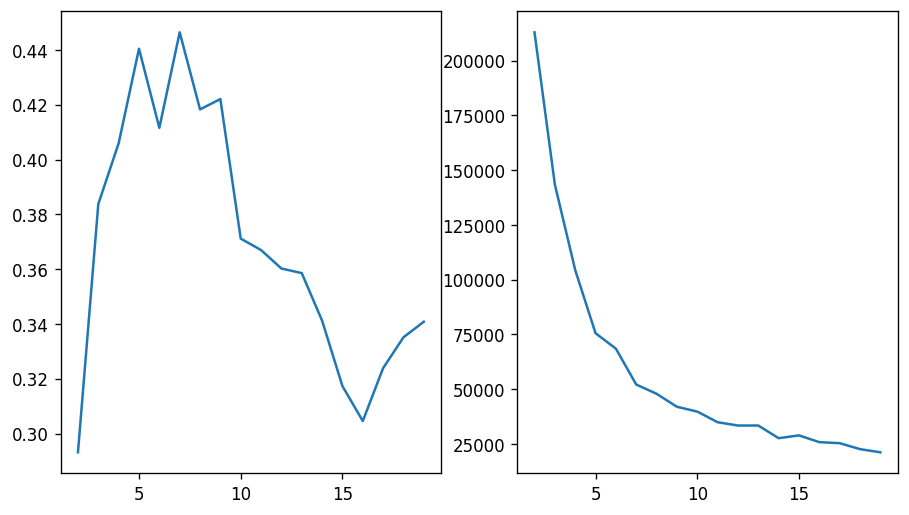

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(9,5))
sns.lineplot(x=k_range, y=sil_scores, ax=axes[0]);
sns.lineplot(x=k_range, y=wcss_scores, ax=axes[1]);
fig.show()

Sau khi kết hợp 2 cách tính ta thấy k = 6 sẽ tối ưu nhất


## 3. Thử sử dụng Hierarchical Clustering

In [35]:
cluster_analysis = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                           metric='euclidean', linkage='ward')
y_pred = cluster_analysis.fit_predict(df)

In [36]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

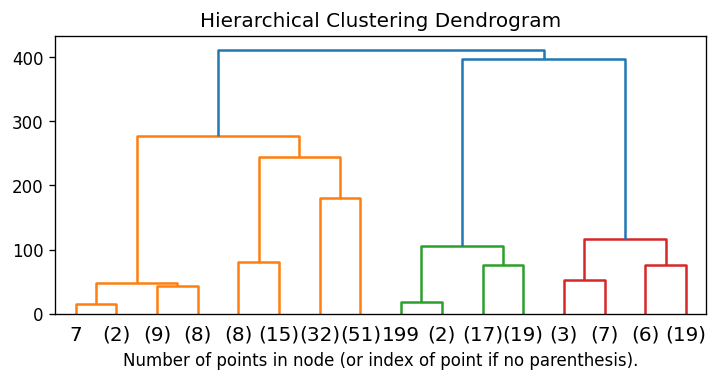

In [37]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(cluster_analysis, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()